# BoomBikes Rental Assignment

### Analysis approach 
1. Data Analysis - a quick look at the data, columns, dtypes, checks to see if any cleanup required
2. Data Cleanup - Perform actual cleanup if any required 
3. Pick columns - Drop out columns manualy based on relevance 
4. Visualize data (Continuous vars) - plot correlation chart, heat map to see the data correlation  
5. Visualize data (categorical vars) - Box plot or bar chart 
6. Dataframe preparation for regression analysis 
7. Apply RFE & Manual approach for variable selection 
8. Model Building - Multiple modelds with selected variables 
9. Model Analysis - residual analysis, homescedacity, r-squared 
10. Summary and recommendations  


In [63]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [64]:
import warnings
warnings.filterwarnings('ignore')

## Data Analysis 

In [65]:
# Load the data and take a peek at the data 
df_main = pd.read_csv('day.csv')

In [66]:
df_main.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [67]:
# check the data types, see if there are any object types.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [68]:
df_main.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
# double check if the date field is all string values 
print( "Total non string values in date :", (df_main['dteday'].map(type) != str).sum())

Total non string values in date : 0


In [70]:
# season, weathersit, month, weekday are said to be categorical variables as per the data definition. double check 
print( "Season categories\n", df_main['season'].value_counts())
print( "month categories\n", df_main['mnth'].value_counts())
print( "weekday categories\n", df_main['weekday'].value_counts())
print( "weathersit categories\n", df_main['weathersit'].value_counts())

Season categories
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
month categories
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
weekday categories
 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
weathersit categories
 1    463
2    246
3     21
Name: weathersit, dtype: int64


In [71]:
# As per above, categorical values are having correct 
df_main.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df_main.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df_main.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
df_main.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

print("mapped categorical colums are\n", df_main[['season','mnth','weekday','weathersit']])

mapped categorical colums are
      season mnth weekday weathersit
0    spring  jan     sat   moderate
1    spring  jan     sun   moderate
2    spring  jan     mon       good
3    spring  jan     tue       good
4    spring  jan     wed       good
..      ...  ...     ...        ...
725  spring  dec     thu   moderate
726  spring  dec     fri   moderate
727  spring  dec     sat   moderate
728  spring  dec     sun       good
729  spring  dec     mon   moderate

[730 rows x 4 columns]


### Observations
1. There are no columns with null records 
2. The data types are none of objects except date field. 
3. The categorical variables are also falling into correct category as per data definition, and they are replaced with descriptive values
3. No specific cleanup required, so the Data Cleanup step can be marked as completed

## Pick Columns ( Manual) 

From data definition and analysis, it appears that the most suitable fields for analysis are
season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt 

dteday field contains date strings, but the same info is available in form of mnth, weekday, season etc, so dropping this as well 

Remaining columns casual, registered, instant, dropping. Remaining columns, planning to be detemined to drop or not after visualization and mathematical analysis

In [72]:
df_main.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df_main.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Visualization - Continuous vars


In [73]:
#defining some utility function for plotting, 
#this is with the intention to reuse it for multiple data sets, or within a same dataset. 

def box_plot(df, figw, figh, col_names,figr=1, figc=4):
    plt.figure(figsize=(figw,figh))
    for idx, col in enumerate(col_names):
        plt.subplot(figr,figc,idx + 1)
        sns.boxplot(y=col, data=df)


def box_plot_categorical(df,figw, figh, target, col_names,figr=1, figc=4):
    plt.figure(figsize=(figw, figh))
    for idx, col in enumerate(col_names):
        plt.subplot(figr,figc,idx+1)
        sns.boxplot(data=df, x=col, y=target)
    plt.show()
        
def pair_plot(df,figw, figh, col_names):
    plt.figure(figsize = (figw,figh))
    sns.pairplot(data=df,vars=col_names)
    plt.show()
    
def corr_plot(df,figw, figh):
    corr = df.corr()
    plt.figure(figsize=(figw,figh))
    sns.heatmap(corr,annot=True )
    plt.show()
    
def regression_plot(df,figw,figh,y_axis,x_axis):
    plt.figure(figsize=(figw,figh))
    sns.regplot(data=df,y=y_axis,x=x_axis)
    plt.title(x_axis + " vs " + y_axis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()


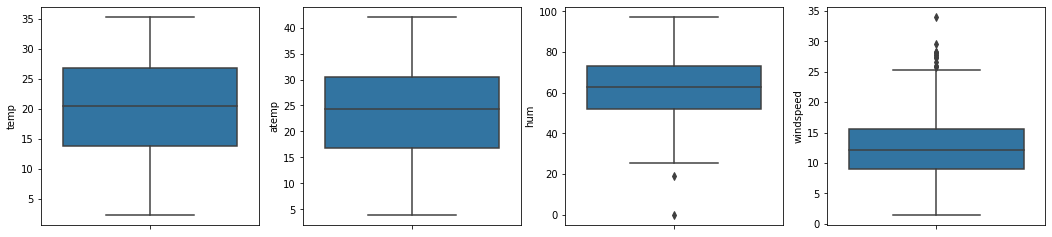

In [74]:
#Visualize the continuous variable values to see how their distribution is. 
box_plot(df_main, 18, 4, ['temp', 'atemp', 'hum', 'windspeed'])


In [75]:
#the figure shows there no much outliers, do a python check as well to see exact numbers 
df_tmp = df_main[['cnt','temp', 'atemp', 'hum', 'windspeed']]
Q1 = df_tmp.quantile(0.25)
Q3 = df_tmp.quantile(0.75)
IQR = Q3 - Q1
((df_tmp < (Q1 - 1.5 * IQR)) | (df_tmp > (Q3 + 1.5 * IQR))).sum()

cnt           0
temp          0
atemp         0
hum           2
windspeed    13
dtype: int64

In [76]:
#OK, not many outliers, not bothering much, now plot a heat map and the corr 

<Figure size 1080x3600 with 0 Axes>

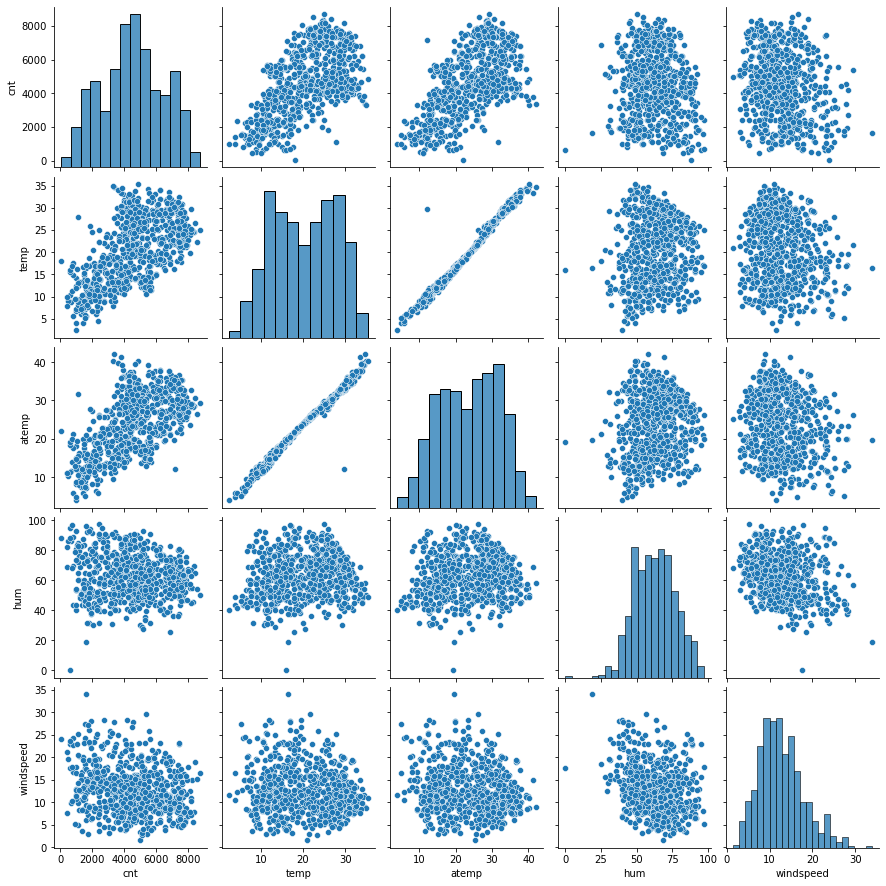

In [77]:
#draw pair plots for finding the relation
pair_plot(df_main,15,50,['cnt', 'temp', 'atemp', 'hum','windspeed'])

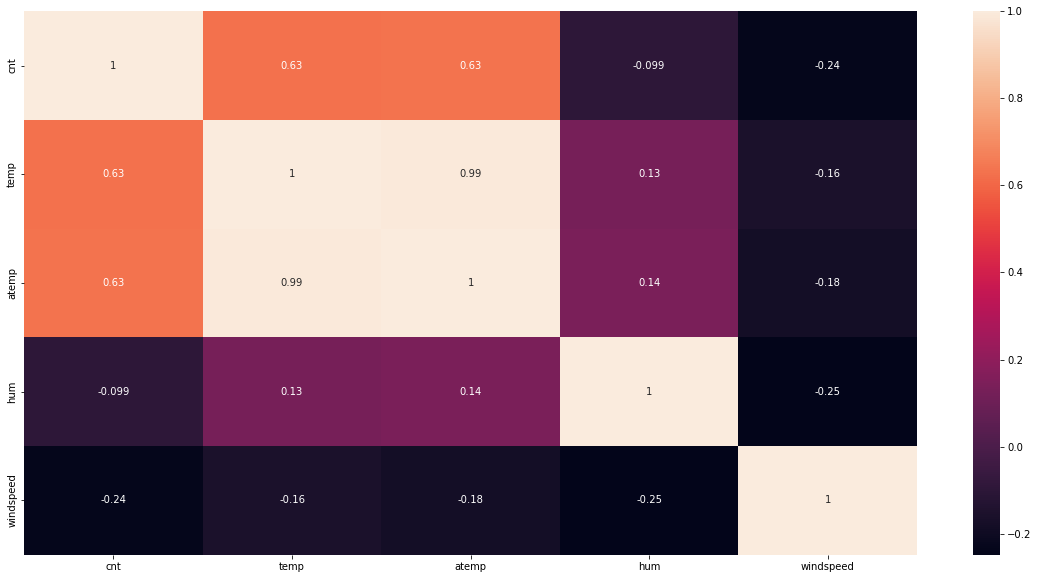

In [78]:
corr_plot(df_tmp,20,10)

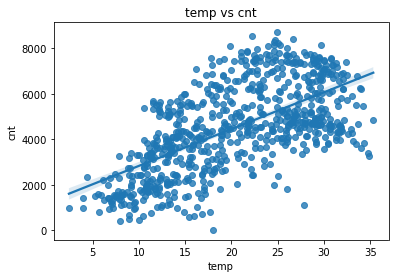

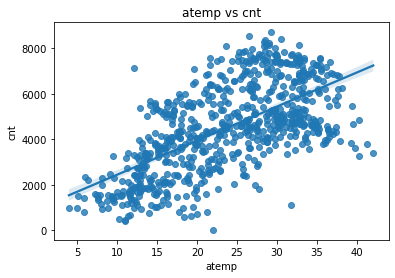

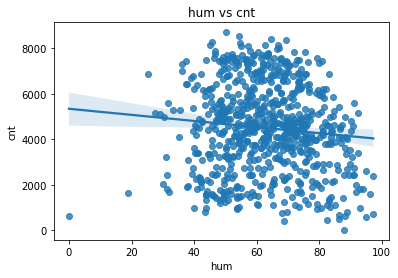

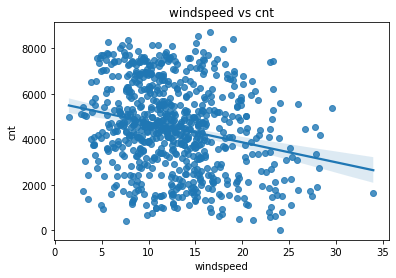

In [79]:
# From the above, mostly the correlation between various variables and cnt is obvious, drawing regplot as well 
regression_plot(df_main,6,4,x_axis='temp',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='atemp',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='hum',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='windspeed',y_axis='cnt')

### Observations
1. As seen from visualuzation, there is linear relationship betwen cnt and temp, atemp  
2. There seems high correlation between temp, atemp variable. Since the high correlation between independent variables is not preferred, one of them can be drppped
2. Humidity, Windspeed are -vely correlated. So, probably not a good time to push more ads during these situations. Yet to figure out scientifically. However, humidy, and temperature, the values are scattered and many are away from the regression line

## Visualize data (categorical vars)

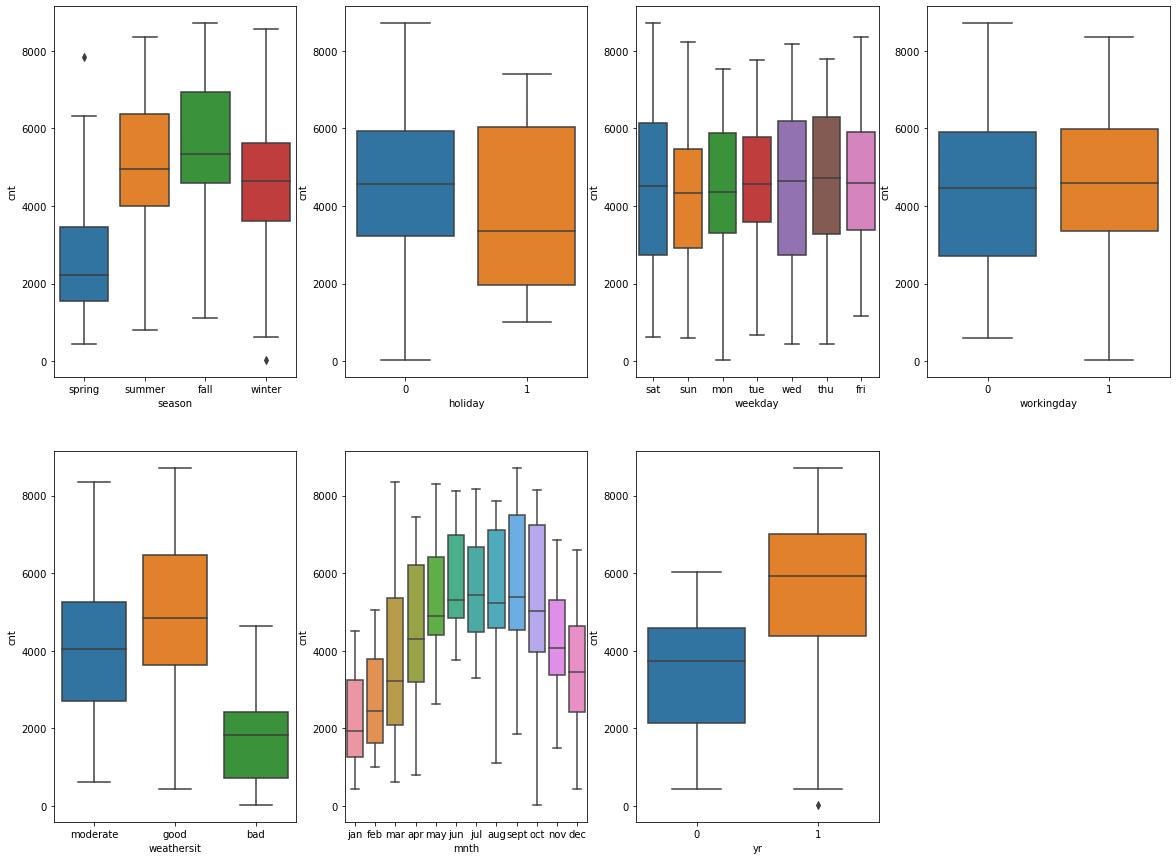

In [80]:
cat_cols = ['season','holiday','weekday','workingday','weathersit','mnth','yr']
box_plot_categorical(df_main,20,15,'cnt', cat_cols,figr=2,figc=4)

### Observations
1. Fall season having highest number of cnt 
2. when it is holiday, the cnt is more.
3. Saturday seems to be having highest number of cnt
4. Working day, the usage is more 
5. When weather situation is good, the cnt is more 
6. month is having good effect on the cnt as well, this is mostly due to the 
7. year 2019 having highest cnt, this seems to be beacause year on year, the business is improving


### Dataframe preparation for regression analysis 
Mainly activities in this step are:
1. Convert categorical variables to dummies 
2. Split the data set to train and test
3. Scale the columns

In [81]:
#Now, possibly can go ahead with linear regression, before which the dummies to be substituted 
#now, it is possible to drop_first to reduce the column requirement by n-1 where n is the level of the categorical value
#but since the dataset is not so big, attempting without drop_first=True 
# df_main = pd.get_dummies(data=df_main,columns=["season","weathersit", "mnth","weekday"],drop_first=True)
df_main = pd.get_dummies(data=df_main,columns=["season","weathersit", "mnth","weekday"])
print(df_main.columns)
df_main.head(10)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_apr',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,1,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,1,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,1,...,0,0,0,0,1,0,0,0,0,0


In [82]:
#now, split the df into train and test

y=df_main['cnt']
df_main.drop(['cnt'], axis = 1, inplace = True)
X=df_main


In [83]:
#For testing, planning to take 20% of data, so training set will be 80%, and also setting random_state , seed to none
#to be non deterministic 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
print("X_train :", X_train)
print("y_train :", y_train)
print("X_test :", X_test)
print("y_test :", y_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train :      yr  holiday  workingday       temp     atemp      hum  windspeed  \
2     0        0           1   8.050924   9.47025  43.7273  16.636703   
109   0        0           1  24.395000  28.21960  61.4167  16.208975   
693   1        0           0  10.079153  12.87915  46.8333  10.083500   
637   1        0           0  21.593347  25.88315  58.3333   9.042186   
432   1        0           1  16.844153  19.85415  40.7083  27.791600   
..   ..      ...         ...        ...       ...      ...        ...   
381   1        0           1  15.294763  18.21390  71.6087  23.391710   
442   1        0           1  22.345000  26.64105  72.8750  10.875239   
399   1        0           0  10.830847  13.63625  77.9583   8.167032   
59    0        0           1  10.933347  13.19395  53.5000  14.500475   
15    0        0           0   9.498347  11.71085  48.3750  12.625011   

     season_fall  season_spring  season_summer  ...  mnth_nov  mnth_oct  \
2              0              1       

In [84]:
#final step in the dataframe preparation will be to scale the variables
#apply normalization 
vars_to_scale = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
#apply scaling for training set 
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
#describe the frame and see to make sure the values normalized 
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,...,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.508562,0.030822,0.693493,0.541225,0.516629,0.644009,0.398366,0.241438,0.244863,0.260274,...,0.083904,0.083904,0.080479,0.148973,0.138699,0.138699,0.136986,0.147260,0.145548,0.143836
std,0.500355,0.172983,0.461438,0.225234,0.210703,0.143656,0.183831,0.428322,0.430375,0.439160,...,0.277482,0.277482,0.272267,0.356367,0.345928,0.345928,0.344128,0.354669,0.352955,0.351224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.342968,0.335811,0.533615,0.268163,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.532731,0.520207,0.640317,0.371641,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690104,0.747750,0.503337,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


OK got everything now mostly to start building the model!!


In [85]:
# Using SKLearn for making the model 
lr = LinearRegression()
lr.fit(X_train,y_train)
#take 15 columns 
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

#for easy manipulation, store the values into a DF and sort based on rank. Lowest rank ones 
#could be selected for further analysis 
df = pd.DataFrame()
df['col'] = ''
df['support'] = False 
df['rank'] = 0

for col, support, ranking in zip(X_train.columns,rfe.support_,rfe.ranking_):
    df.loc[len(df.index)] = [col, support, ranking]
df.sort_values("rank", inplace=True)
# print ('df is \n',df) 
#select only the ones having lowest rank value, 
df_selected = df[ df['rank'] == 1]
# print("Selected ones are \n",df_selected)
rfe_selected_cols = df_selected['col'].tolist()
print ('rfe_selected_cols ::\n', rfe_selected_cols)

rfe_selected_cols ::
 ['mnth_dec', 'mnth_jul', 'mnth_jan', 'mnth_feb', 'mnth_nov', 'mnth_apr', 'weathersit_moderate', 'weathersit_good', 'mnth_mar', 'season_winter', 'weathersit_bad', 'season_spring', 'season_fall', 'mnth_oct', 'season_summer']


In [86]:
#define utility methods for building model, VIF calculation etc for manual method 
def model_fn(cols, ytrain, xtrain):
    # add intercept as the stats model does not add it by default 
    sm_xtrain = sm.add_constant(xtrain[cols])
    #fit the model to the given columns
    lm = sm.OLS(ytrain, sm_xtrain).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def vif_fn(cols,ytrain,xtrain):
    df1 = xtrain[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [87]:
cols = rfe_selected_cols

build_model(cols,y_train,X_train)
get_vif(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     43.63
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           8.40e-77
Time:                        21:40:09   Log-Likelihood:                -5047.2
No. Observations:                 584   AIC:                         1.012e+04
Df Residuals:                     570   BIC:                         1.018e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2828.4793    

In [88]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     208.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          3.04e-213
Time:                        21:40:09   Log-Likelihood:                -4719.6
No. Observations:                 584   AIC:                             9469.
Df Residuals:                     569   BIC:                             9535.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2522.2537    

In [93]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          4.77e-210
Time:                        21:43:42   Log-Likelihood:                -4730.0
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     570   BIC:                             9549.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1732.4319    

In [92]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     231.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          3.22e-210
Time:                        21:43:35   Log-Likelihood:                -4732.4
No. Observations:                 584   AIC:                             9491.
Df Residuals:                     571   BIC:                             9548.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1667.6385    

In [94]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     249.8
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          3.62e-210
Time:                        21:44:18   Log-Likelihood:                -4735.4
No. Observations:                 584   AIC:                             9495.
Df Residuals:                     572   BIC:                             9547.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1592.1400    

In [95]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          1.81e-172
Time:                        21:45:00   Log-Likelihood:                -4827.1
No. Observations:                 584   AIC:                             9676.
Df Residuals:                     573   BIC:                             9724.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4679.4263    

In [96]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     91.73
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          4.91e-112
Time:                        21:45:30   Log-Likelihood:                -4969.8
No. Observations:                 584   AIC:                             9962.
Df Residuals:                     573   BIC:                         1.001e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3061.8660    

In [97]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     91.73
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          4.91e-112
Time:                        21:46:43   Log-Likelihood:                -4969.8
No. Observations:                 584   AIC:                             9962.
Df Residuals:                     573   BIC:                         1.001e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3061.8660    

In [98]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     175.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          4.48e-167
Time:                        21:47:13   Log-Likelihood:                -4839.8
No. Observations:                 584   AIC:                             9702.
Df Residuals:                     573   BIC:                             9750.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4263.9114    

In [99]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          1.73e-165
Time:                        21:47:57   Log-Likelihood:                -4843.5
No. Observations:                 584   AIC:                             9709.
Df Residuals:                     573   BIC:                             9757.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4600.2525    

In [100]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     285.0
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          2.98e-205
Time:                        21:48:29   Log-Likelihood:                -4752.8
No. Observations:                 584   AIC:                             9526.
Df Residuals:                     574   BIC:                             9569.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1907.9035    